<a href="https://colab.research.google.com/github/aleksandrkissel/First/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Подключение Pandas и NumPy
import pandas as pd
import numpy as np

In [62]:
# 2. Пример создания таблицы (DataFrame) с помощью кода
df_init = pd.DataFrame({
    'Название ТЭС': ['Сургутская ГРЭС-2', 'Рефтинская ГРЭС', 'Костромская ГРЭС'],
    'Мощность': [5657, 3800, 3600],
    'Собственник': ['Юнипро', 'Кузбассэнерго', 'Интер РАО']
})

df_init.head()

,Название ТЭС,Мощность,Собственник
0,Сургутская ГРЭС-2,5657,Юнипро
1,Рефтинская ГРЭС,3800,Кузбассэнерго
2,Костромская ГРЭС,3600,Интер РАО


In [80]:
# 3. Добавление строк
# Для добавления строк можно использовать функцию append. По сути здесь создается еще одна таблица тем же способом, что df_init. Затем добавляется к df_init
df_exted = df_init.append(pd.DataFrame({'Название ТЭС': ['Пермская ГРЭС', 'Сургутская ГРЭС-1'], 'Мощность': [3363, 3333], 'Собственник': ['Интер РАО', 'ОГК-2']}), ignore_index = True)

# первые строки таблицы можно вывести на экран в более простом виде, применив функцию print.
print(df_exted)
print()

# Получение списка имен столбцов
print('имена столбцов:', df_exted.columns.values)

        Название ТЭС  Мощность    Собственник
0  Сургутская ГРЭС-2      5657         Юнипро
1    Рефтинская ГРЭС      3800  Кузбассэнерго
2   Костромская ГРЭС      3600      Интер РАО
3      Пермская ГРЭС      3363      Интер РАО
4  Сургутская ГРЭС-1      3333          ОГК-2

имена столбцов: ['Название ТЭС' 'Мощность' 'Собственник']


<ipython-input-80-10b83b6ac0d7>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_exted = df_init.append(pd.DataFrame({'Название ТЭС': ['Пермская ГРЭС', 'Сургутская ГРЭС-1'], 'Мощность': [3363, 3333], 'Собственник': ['Интер РАО', 'ОГК-2']}), ignore_index = True)


In [81]:
# 4. Добавление столбца.
# Например, добавим каждой станции условное обозначение - идентификатор
df_exted.insert(0, 'id', ['1', '2', '3', '4', '5'])

print(df_exted)
print()

# Установка id в качестве индекса строки
df_exted = df_exted.set_index('id')

print(df_exted)

  id       Название ТЭС  Мощность    Собственник
0  1  Сургутская ГРЭС-2      5657         Юнипро
1  2    Рефтинская ГРЭС      3800  Кузбассэнерго
2  3   Костромская ГРЭС      3600      Интер РАО
3  4      Пермская ГРЭС      3363      Интер РАО
4  5  Сургутская ГРЭС-1      3333          ОГК-2

         Название ТЭС  Мощность    Собственник
id                                            
1   Сургутская ГРЭС-2      5657         Юнипро
2     Рефтинская ГРЭС      3800  Кузбассэнерго
3    Костромская ГРЭС      3600      Интер РАО
4       Пермская ГРЭС      3363      Интер РАО
5   Сургутская ГРЭС-1      3333          ОГК-2


In [83]:
# 5. Сортировка
df_exted = df_exted.sort_values(['Название ТЭС'])
print(df_exted)
print()

# ascending задает сортировку по убыванию или возрастанию
# по умолчанию True - сортировка по убыванию, если поставить False, то будет по возрастанию
df_exted = df_exted.sort_values(['Мощность'], ascending = True)
print(df_exted)

         Название ТЭС  Мощность    Собственник
id                                            
3    Костромская ГРЭС      3600      Интер РАО
4       Пермская ГРЭС      3363      Интер РАО
2     Рефтинская ГРЭС      3800  Кузбассэнерго
5   Сургутская ГРЭС-1      3333          ОГК-2
1   Сургутская ГРЭС-2      5657         Юнипро

         Название ТЭС  Мощность    Собственник
id                                            
5   Сургутская ГРЭС-1      3333          ОГК-2
4       Пермская ГРЭС      3363      Интер РАО
3    Костромская ГРЭС      3600      Интер РАО
2     Рефтинская ГРЭС      3800  Кузбассэнерго
1   Сургутская ГРЭС-2      5657         Юнипро


In [84]:
# 6. Создание столбцов на основе вычислений.
# Чтобы случайно не испортить df_exted, будем работать с копией
df_exted_2 = df_exted.copy()

# Добавление столбца на основе формулы делается легко
df_exted_2['выработка_за_сутки'] = df_exted_2['Мощность'] * 24 # 24 часа в сутках

# Сложности могут возникнуть когда нужно реализовать условия и работать с текстовыми данными.
# Например, нужно по названию определить тип электростанции.
# Условия можно задавать через NumPy функцию where, а поиск подстроки в строке через find.
# Так можно одной строкой задать целый алгоритм:
# если в имени есть ГЭС:
#   тип - ГЭС;
# иначе
#   если в имени есть ТЭЦ:
#     тип - ТЭЦ
#   иначе
#     тип - не определен

df_exted_2['тип'] = np.where(df_exted_2['Название ТЭС'].str.find('ГЭС') >= 0, 'ГЭС', np.where(df_exted_2['Название ТЭС'].str.find('ТЭЦ') >= 0, 'ТЭЦ', '?'))

print(df_exted_2)
print()

# Легко применить расчеты, используя несколько столбцов сразу
df_exted_2['проверка_расчетов'] =  df_exted_2['выработка_за_сутки'] / df_exted_2['Мощность'] == 24
print(df_exted_2)

         Название ТЭС  Мощность    Собственник  выработка_за_сутки тип
id                                                                    
5   Сургутская ГРЭС-1      3333          ОГК-2               79992   ?
4       Пермская ГРЭС      3363      Интер РАО               80712   ?
3    Костромская ГРЭС      3600      Интер РАО               86400   ?
2     Рефтинская ГРЭС      3800  Кузбассэнерго               91200   ?
1   Сургутская ГРЭС-2      5657         Юнипро              135768   ?

         Название ТЭС  Мощность    Собственник  выработка_за_сутки тип  \
id                                                                       
5   Сургутская ГРЭС-1      3333          ОГК-2               79992   ?   
4       Пермская ГРЭС      3363      Интер РАО               80712   ?   
3    Костромская ГРЭС      3600      Интер РАО               86400   ?   
2     Рефтинская ГРЭС      3800  Кузбассэнерго               91200   ?   
1   Сургутская ГРЭС-2      5657         Юнипро            

In [86]:
# 7.2. Через loc по именам строк и столбцов
print('данные из строк \'3\' и \'2\' и столбцов \'имя\' и \'мощность\'')
print(df_exted_2.loc[['3', '2'], ['Название ТЭС', 'Мощность']])
print()
print('все данные из строки \'4\'')
print(df_exted_2.loc[['4']])
print()

данные из строк '3' и '2' и столбцов 'имя' и 'мощность'
        Название ТЭС  Мощность
id                            
3   Костромская ГРЭС      3600
2    Рефтинская ГРЭС      3800

все данные из строки '4'
     Название ТЭС  Мощность Собственник  выработка_за_сутки тип  \
id                                                                
4   Пермская ГРЭС      3363   Интер РАО               80712   ?   

    проверка_расчетов  
id                     
4                True  



In [87]:
# 8. Удаление столбцов.
df_exted = df_exted_2.drop(['проверка_расчетов'], axis='columns')

print(df_exted)

         Название ТЭС  Мощность    Собственник  выработка_за_сутки тип
id                                                                    
5   Сургутская ГРЭС-1      3333          ОГК-2               79992   ?
4       Пермская ГРЭС      3363      Интер РАО               80712   ?
3    Костромская ГРЭС      3600      Интер РАО               86400   ?
2     Рефтинская ГРЭС      3800  Кузбассэнерго               91200   ?
1   Сургутская ГРЭС-2      5657         Юнипро              135768   ?


In [92]:
# 9. Выборка данных по условию.
# Выбрать электростанции с мощностью выше 400 МВт
print(df_exted[df_exted['Мощность'] > 400.])
print()

# Можно писать короче, если имя столбца не содержит пробела
print(df_exted[df_exted.Мощность > 400.])
print()

# Выбрать электростанции с мощностью выше 400 МВт
print(df_exted[(df_exted.Мощность > 400.)])
print()

# Выбрать электростанции с мощностью выше 1000 МВт
print(df_exted[(df_exted.Мощность > 1000.)])

         Название ТЭС  Мощность    Собственник  выработка_за_сутки тип
id                                                                    
5   Сургутская ГРЭС-1      3333          ОГК-2               79992   ?
4       Пермская ГРЭС      3363      Интер РАО               80712   ?
3    Костромская ГРЭС      3600      Интер РАО               86400   ?
2     Рефтинская ГРЭС      3800  Кузбассэнерго               91200   ?
1   Сургутская ГРЭС-2      5657         Юнипро              135768   ?

         Название ТЭС  Мощность    Собственник  выработка_за_сутки тип
id                                                                    
5   Сургутская ГРЭС-1      3333          ОГК-2               79992   ?
4       Пермская ГРЭС      3363      Интер РАО               80712   ?
3    Костромская ГРЭС      3600      Интер РАО               86400   ?
2     Рефтинская ГРЭС      3800  Кузбассэнерго               91200   ?
1   Сургутская ГРЭС-2      5657         Юнипро              135768   ?

    

In [95]:
# 10. Статистические расчеты по сгруппированным данным.

# Число электростанций по мощности выше 500 МВт и разделением по собственникам
print(df_exted.groupby(['Собственник', df_exted['Мощность'] > 500])['Мощность'].count())
print()

Собственник    Мощность
Интер РАО      True        2
Кузбассэнерго  True        1
ОГК-2          True        1
Юнипро         True        1
Name: Мощность, dtype: int64



<ipython-input-108-1a37f06f4e5e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_exted.groupby(['Мощность']).sum().plot(kind = 'barh')


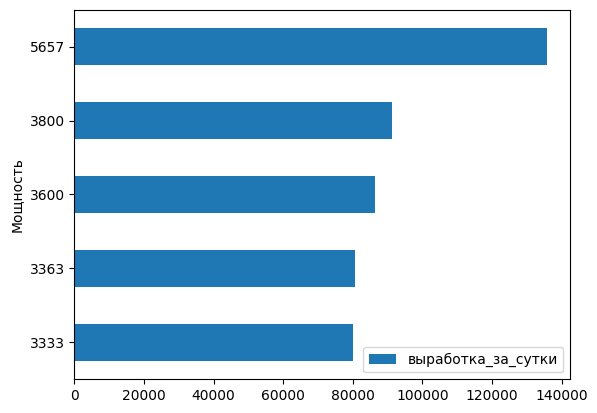

In [108]:
# 13. Гистограмма после группировки
df_exted.groupby(['Мощность']).sum().plot(kind = 'barh')
print()

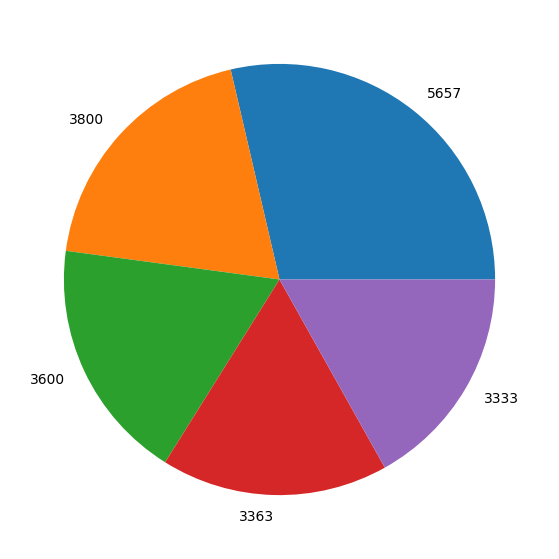

In [127]:
# 13. Круговая гистограмма
from matplotlib import pyplot as plt
import numpy as np


# Creating dataset
Мощности = ['5657', '3800', '3600',
        '3363', '3333']

data = [5657, 3800, 3600, 3363, 3333]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Мощности)
# show plot
plt.show()
